# An Introduction to Options Pricing
An options contract gives the owner the right but not the obligation to buy/sell a contract at a certain price at a certain time in the future. 

Options are of two types: A call option is the right to buy or take a long position in a given asset at a fixed price on or before a specified data. A put option is the irght to sell or take a short position in a given asset. 

Terms:

The assset to the bought or sold under the terms of the contract is the underlying asset.

The exercise price or strike price is the price at which the underlying will be delivered should the holder of an option choose to exercise his/her right to buy or sell.

The date after which the option may no longer be exercised is the expiration date.


### Some more terminology
Bid: The highest price at which a buyer is willing to purchase an asset

Ask: The lowest price at which a sseller is willing to sell an asset

## Example
You want to buy a house, price agreed is £600,000
- You like the house but want some time to consider others
- The seller agrees to grant you the option
to buy the house in one month’s time
- To compensate seller for lost opportunity, you pay £1000 for the right to choose
to buy the house at any time during the next month
- You have bought a “Call Option

# 4 Main Inputs

1. Price of the underlying
2. Time to Expiry
3. Probability (volatility when thinking about derivatives)
4. Interest Rates

https://www.cmegroup.com/markets/agriculture/grains/corn.html

## Calls and Puts
1. Buying  a call: Buying the right to buy a contract
2. Selling a call: Sell the right to buy a contract
3. Buying  a put : Buy the right to sell a contract
4. Selling a put : Sell the right to sell a contract

An options price i made up of two components: 
- Intrinsic value (IV)
- Time Value (TV)

IV >= 0 at all times

Time value is the amount needed to compensate the options seller against the risk of the option increasing in intrinsic value.

An option of the same strike price at the same time have the same TV

### Put/Call Parity

Call = Put + (Underlying asset - strike price)


## Payoff diagrams

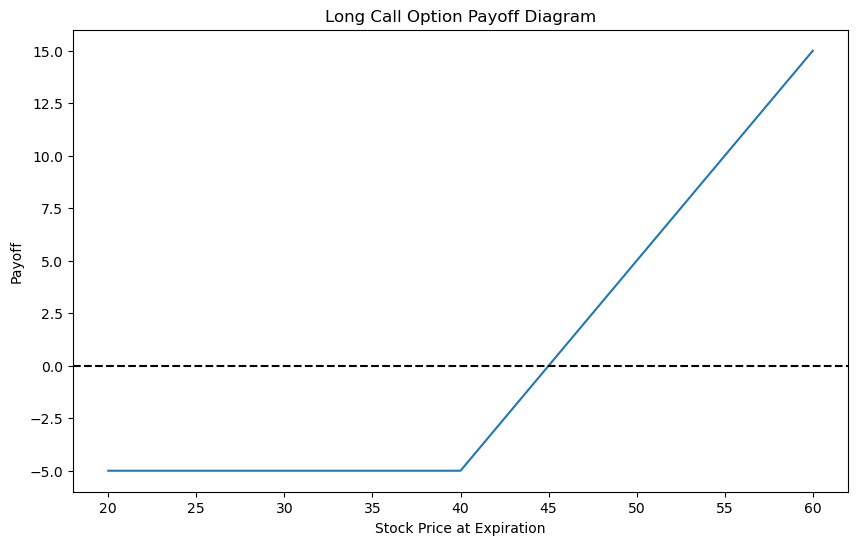

In [2]:
import numpy as np
import matplotlib.pyplot as plt

stock_price = np.arange(20, 61, 1)

payoff = np.maximum(stock_price - 40, 0) -5


plt.figure(figsize=(10, 6))
plt.plot(stock_price, payoff, label='Long Call Option Payoff')
plt.axhline(0, color='black', ls='--')
plt.xlabel('Stock Price at Expiration')
plt.ylabel('Payoff')
plt.title('Long Call Option Payoff Diagram')
plt.show()

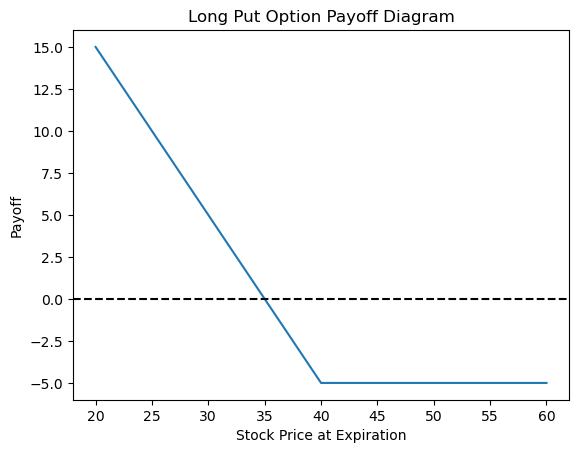

In [3]:
# Payoff diagram for a long put option with a strike price of $40
payoff = np.maximum(40 - stock_price, 0) -5
plt.plot(stock_price, payoff, label='Long Put Option Payoff')
plt.axhline(0, color='black', ls='--')
plt.xlabel('Stock Price at Expiration')
plt.ylabel('Payoff')
plt.title('Long Put Option Payoff Diagram')
plt.show()


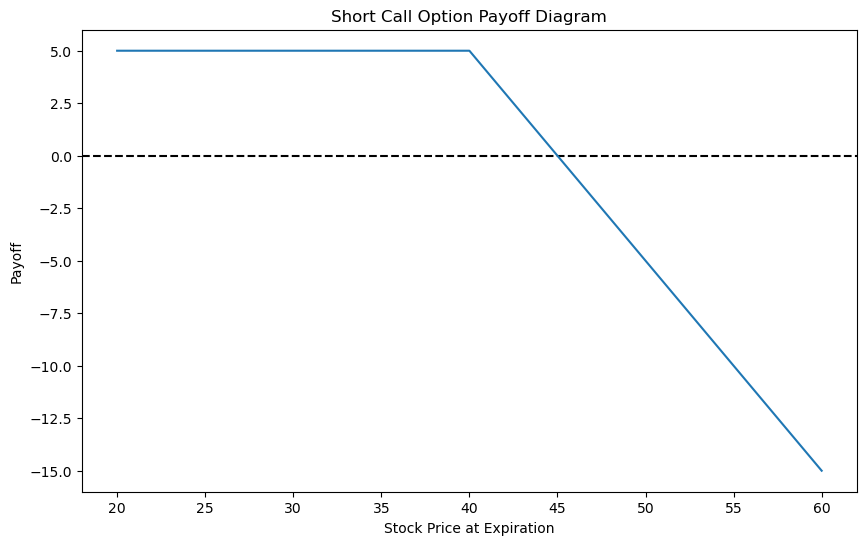

In [4]:
# Payoff diagram for a short call option with a strike price of $40
payoff = -np.maximum(stock_price - 40, 0)+5
plt.figure(figsize=(10, 6))
plt.axhline(0, color='black', ls='--')
plt.plot(stock_price, payoff, label='Short Call Option Payoff')
plt.xlabel('Stock Price at Expiration')
plt.ylabel('Payoff')
plt.title('Short Call Option Payoff Diagram')
plt.show()

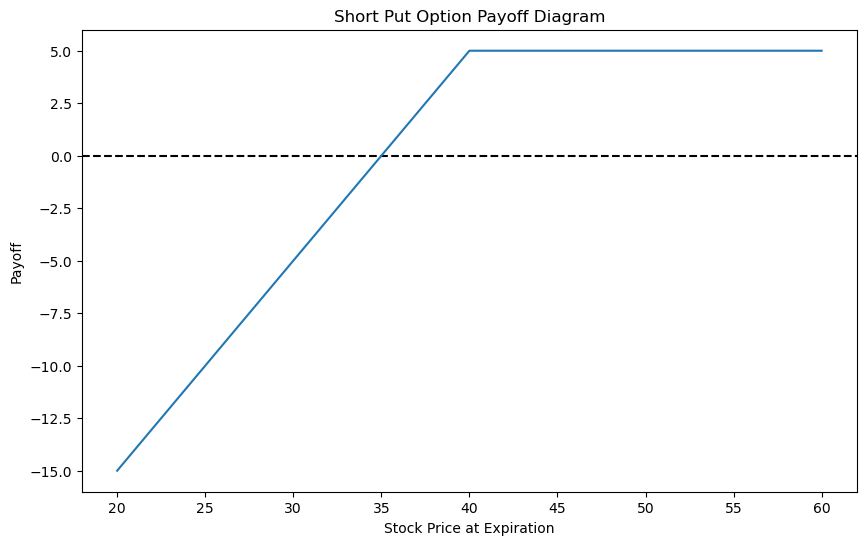

In [5]:
# Payoff diagram for a short put option with a strike price of $40
payoff = -np.maximum(40 - stock_price, 0)+5
plt.figure(figsize=(10, 6))
plt.axhline(0, color='black', ls='--')
plt.plot(stock_price, payoff, label='Short Put Option Payoff')
plt.xlabel('Stock Price at Expiration')
plt.ylabel('Payoff')
plt.title('Short Put Option Payoff Diagram')
plt.show()

## Even more terminology!
Terminology for the strike position, K, relative to the market value of the underlying; commonly referred to as moneyness
- In the Money: the intrinsic value is greater than zero. Selling would give a positive net cash inflow.
- At the Money: Zero intrinsic value. The options whose strike price is roughly equal to the current market price of the underlying
- Out of the Money: OTM call options have a strike price higher than the current market price of the underlying. OTM put options have a strike price lower than the current market price of the underlying.

## Synthetics
By trading an option in combination with futures we can convert a put into a call or a call into a put.

A synthetic call: combines buying the asset and also purchasing an at-the-money put option on the same stock to protect against depreciation in the stock's price

A synthetic put: combines a short stock position with a long call option on that same stock to mimic a long put option. An investor who has a short position in a stock purchases an ATM call option on that same stock. This action is taken to protect against appreciation in the stock's price. 

Text(0, 0.5, 'Payoff')

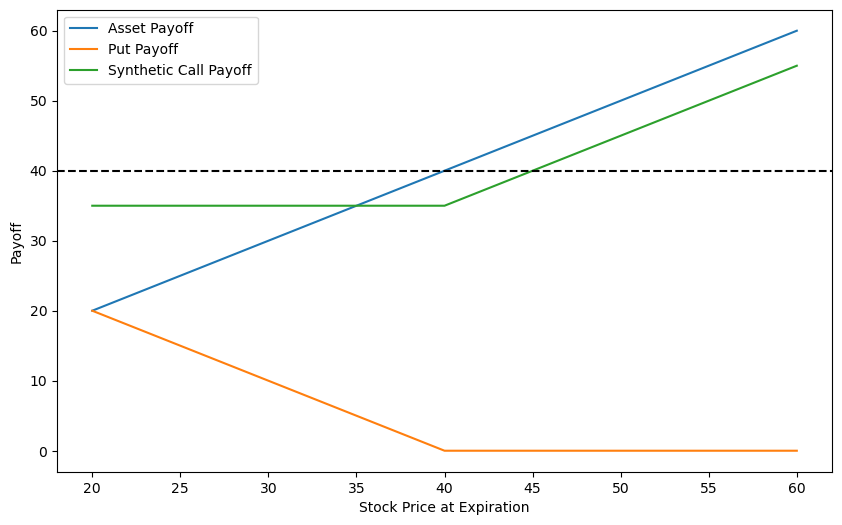

In [6]:
payoff_asset = stock_price
payoff_put = np.maximum(40 - stock_price, 0)
synthetic_put = payoff_asset + payoff_put-5

plt.figure(figsize=(10, 6))
plt.plot(stock_price, payoff_asset, label='Asset Payoff')
plt.plot(stock_price, payoff_put, label='Put Payoff')
plt.plot(stock_price, synthetic_put, label='Synthetic Call Payoff')
plt.axhline(40, color='black', ls='--')
plt.xlabel('Stock Price at Expiration')
plt.legend()
plt.ylabel('Payoff')

## Options Greeks
### 1. Delta (Δ)
- 
  $
  \Delta = \frac{\partial V}{\partial S}
  $
  - Measures the rate of change of the option price with respect to changes in the underlying asset's price.
  
### 2. Gamma (Γ)
- 
  $
  \Gamma = \frac{\partial^2 V}{\partial S^2}
  $
  - Measures the rate of change of Delta with respect to the underlying asset's price.

### 3. Theta (Θ)
- 
  $
  \theta = \frac{\partial V}{\partial T}
  $  
  - Measures the rate of change of the option price with respect to the passage of time (time decay).

### 4. Vega (ν)
-  
  $
  \nu = \frac{\partial V}{\partial \sigma}
  $  
  -  Measures the sensitivity of the option price to changes in volatility.

### 5. Rho (ρ)
-  
  $
  \rho = \frac{\partial V}{\partial r}
  $  
  - Measures the sensitivity of the option price to changes in the risk-free interest rate.

- V: option value
- S: asset price
- $\sigma$: implied volatility
- T: time to expiry
- r: interest rate



## Binomial Model


The **binomial tree model** is a numerical method for pricing options by discretizing the time to expiration into a binomial lattice. At each time step, the underlying asset price can either go **up** or **down** by a certain factor. The method works by working backwards from the option's final payoff to the present value.

### 1. **Setup of Parameters**

We define the following parameters:
- **$S_0$**: The initial price of the underlying asset.
- **$K$**: The strike price of the option.
- **$r$**: The risk-free interest rate.
- **$\sigma$**: The volatility of the underlying asset.
- **$T$**: The time to expiration (in years).
- **$n$**: The number of steps in the binomial tree.

### 2. **Time Step and Up/Down Factors**

The binomial model divides the time to expiration into **$n$** steps, so the time interval for each step is:

$$
\Delta t = \frac{T}{n}
$$

The up and down factors for the price of the asset are defined as follows:

- **Up factor ($u$)**:
  $$
  u = e^{\sigma \sqrt{\Delta t}}
  $$

- **Down factor ($d$)**:
  $$
  d = e^{-\sigma \sqrt{\Delta t}}
  $$

These factors represent the percentage change in the asset's price during each time step.

### 3. **Risk-Neutral Probability**

In a **risk-neutral world**, the expected return of the asset is the risk-free rate. The risk-neutral probability **$p$** of the price going up is calculated as:

$$
p = \frac{e^{r \Delta t} - d}{u - d}
$$

Where:
- **$e^{r \Delta t}$** is the discount factor for the risk-free rate over one time step.

The probability of the price going down is simply:

$$
1 - p
$$

### 4. **Asset Price Evolution**

At each time step, the asset price evolves according to the up and down factors. The price at each node **$(i, j)$** in the binomial tree can be written as:

$$
S_{i,j} = S_0 u^j d^{i-j}
$$

Where:
- **$S_{i,j}$** is the asset price at step **$i$** and node **$j$**.
- **$i$** is the current step.
- **$j$** is the number of up moves.

### 5. **Option Payoff at Final Nodes**

At the final step (when **$i = n$**), the option payoff is calculated at each possible asset price. For a **European call option**, the payoff at the final nodes is:

$$
\text{Payoff}_n = \max(S_{n} - K, 0)
$$

For a **European put option**, the payoff is:

$$
\text{Payoff}_n = \max(K - S_{n}, 0)
$$

### 6. **Backwards Induction**

Once the payoffs at the final nodes are known, we work backwards through the tree to calculate the option price at each previous node. The price of the option at each node is the discounted expected value of the option price at the next time step. For a node **$(i, j)$**, the option price is:

$$
C_{i,j}(t) = e^{-r \Delta t} \left[ p C_{i+1,j+1}(t+1) + (1 - p) C_{i+1,j}(t+1) \right]
$$

Where:
- **$C_{i,j}(t)$** is the option price at node **$(i,j)$** at time **$t$**.
- **$C_{i+1,j+1}(t+1)$** and **$C_{i+1,j}(t+1)$** are the option prices at the next step after an up and down move, respectively.
- **$e^{-r \Delta t}$** is the discount factor.

This process is repeated until we reach the root node at **$t = 0$**, which gives the current price of the option.

### 7. **Initial Option Price**

Finally, the initial option price **$C_0$** at time **$t = 0$** is:

$$
C_0 = e^{-r \Delta t} \left[ p C_1 + (1 - p) C_2 \right]
$$

Where **$C_1$** and **$C_2$** are the option prices at the next time step, and this process is repeated for each node in the tree.


This method is useful because it can be applied to various types of options and works well for European options, which can only be exercised at expiration. Increasing the number of steps in the binomial tree results in a more accurate estimate of the option's value.


In [7]:
S = 50
K = 40
r = 0.05
T = 1
N = 100
sigma = 0.2

def binomial_tree_call(S, K, r, T, N, sigma):
    dt = T / N
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(r * dt) - d) / (u - d)
    C = np.zeros((N + 1, N + 1))
    S_values = np.zeros((N + 1, N + 1))
    for i in range(N + 1):
        S_values[i, N] = S * (u ** (N - i)) * (d ** i)
        C[i, N] = np.maximum(S_values[i, N] - K, 0)
    for j in range(N - 1, -1, -1):
        for i in range(j + 1):
            C[i, j] = np.exp(-r * dt) * (p * C[i, j + 1] + (1 - p) * C[i + 1, j + 1])
            S_values[i, j] = S_values[i, j + 1] / u
    return C[0, 0]


call_price = binomial_tree_call(S, K, r, T, N, sigma)
print(f'The price of the call option is: {call_price:.2f}')



The price of the call option is: 12.30


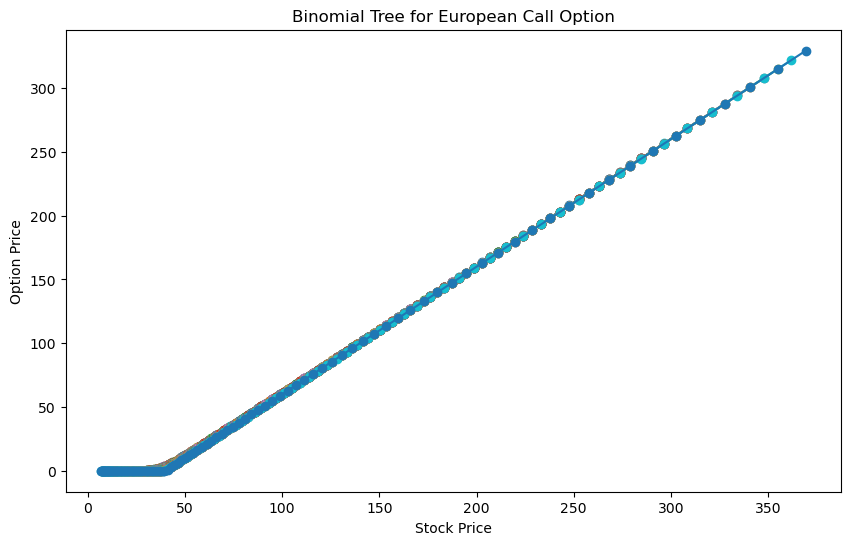

In [8]:
dt = T / N
u = np.exp(sigma * np.sqrt(dt))
d = 1 / u
p = (np.exp(r * dt) - d) / (u - d)
C = np.zeros((N + 1, N + 1))
S_values = np.zeros((N + 1, N + 1))
for i in range(N + 1):
    S_values[i, N] = S * (u ** (N - i)) * (d ** i)
    C[i, N] = np.maximum(S_values[i, N] - K, 0)
for j in range(N - 1, -1, -1):
    for i in range(j + 1):
        C[i, j] = np.exp(-r * dt) * (p * C[i, j + 1] + (1 - p) * C[i + 1, j + 1])
        S_values[i, j] = S_values[i, j + 1] / u

plt.figure(figsize=(10, 6))
for j in range(N + 1):
    plt.plot(S_values[:j + 1, j], C[:j + 1, j], 'o-')
plt.xlabel('Stock Price')
plt.ylabel('Option Price')
plt.title('Binomial Tree for European Call Option')
plt.show()

In [9]:
def binomial_tree_put(S, K, r, T, N, sigma):
    dt = T / N
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(r * dt) - d) / (u - d)
    P = np.zeros((N + 1, N + 1))
    S_values = np.zeros((N + 1, N + 1))
    for i in range(N + 1):
        S_values[i, N] = S * (u ** (N - i)) * (d ** i)
        P[i, N] = np.maximum(K - S_values[i, N], 0)
    for j in range(N - 1, -1, -1):
        for i in range(j + 1):
            P[i, j] = np.exp(-r * dt) * (p * P[i, j + 1] + (1 - p) * P[i + 1, j + 1])
            S_values[i, j] = S_values[i, j + 1] / u
    return P[0, 0]

put_price = binomial_tree_put(S, K, r, T, N, sigma)
print(f'The price of the put option is: {put_price:.2f}')

The price of the put option is: 0.35


# Derivation of the Black-Scholes Model

## Assumptions:
1. The stock price follows a geometric Brownian motion:
   $$ dS_t = \mu S_t dt + \sigma S_t dW_t $$
   where:
   - $S_t$ is the stock price at time  $t$
   - $ \mu $ is the expected return
   - $\sigma$ is the volatility
   - $W_t $ is a Wiener process

2. There exists a risk-free asset with rate \( r \):
   $$ dB_t = r B_t dt $$

3. No arbitrage opportunities exist, and the market is frictionless.

### Ito's Lemma

If $ X_t $ follows the stochastic differential equation:

$$
dX_t = \mu(X_t, t) dt + \sigma(X_t, t) dW_t
$$

then for a twice-differentiable function $ f(X, t) $, Ito’s Lemma states:

$$
df = \left( \frac{\partial f}{\partial t} + \mu \frac{\partial f}{\partial X} + \frac{1}{2} \sigma^2 \frac{\partial^2 f}{\partial X^2} \right) dt + \sigma \frac{\partial f}{\partial X} dW_t
$$

## Applying Ito’s Lemma:
Consider a derivative price $ V(S, t)$, then applying Ito’s Lemma:
   $$ dV = \frac{\partial V}{\partial t} dt + \frac{\partial V}{\partial S} dS + \frac{1}{2} \frac{\partial^2 V}{\partial S^2} dS^2 $$

Substituting $ dS_t $ and using $ dW_t^2 = dt $:
   $$ dV = \left( \frac{\partial V}{\partial t} + \mu S \frac{\partial V}{\partial S} + \frac{1}{2} \sigma^2 S^2 \frac{\partial^2 V}{\partial S^2} \right) dt + \sigma S \frac{\partial V}{\partial S} dW_t $$

To eliminate risk, construct a risk-neutral portfolio:
   $$ \Pi = V - \Delta S $$

Choosing $ \Delta = \frac{\partial V}{\partial S} $ cancels out the stochastic term:
   $$ d\Pi = \left( \frac{\partial V}{\partial t} + \frac{1}{2} \sigma^2 S^2 \frac{\partial^2 V}{\partial S^2} \right) dt $$

Since the portfolio earns risk-free rate:
   $$ \frac{d\Pi}{dt} = r \Pi $$

Substituting $ \Pi = V - \Delta S $:
   $$ \frac{\partial V}{\partial t} + \frac{1}{2} \sigma^2 S^2 \frac{\partial^2 V}{\partial S^2} + r S \frac{\partial V}{\partial S} - rV = 0 $$

This is the **Black-Scholes equation**:
   $$ \frac{\partial V}{\partial t} + \frac{1}{2} \sigma^2 S^2 \frac{\partial^2 V}{\partial S^2} + r S \frac{\partial V}{\partial S} - rV = 0 $$

Solving this equation under boundary conditions gives the **Black-Scholes formula** for a European call option:
   $$ C(S, t) = S N(d_1) - Ke^{-r(T-t)} N(d_2) $$
   where:
   $$ d_1 = \frac{\ln(S/K) + (r + \sigma^2/2)(T - t)}{\sigma \sqrt{T - t}} $$
   $$ d_2 = d_1 - \sigma \sqrt{T - t} $$
   and $N(d) $ is the cumulative standard normal distribution.

   https://digitalcommons.georgiasouthern.edu/cgi/viewcontent.cgi?article=1247&context=honors-theses


## Call Option Price Formula

$$
C = S_0 N(d_1) - K e^{-rT} N(d_2)
$$

Where:
- **$C$**: The price of the call option.
- **$S_0$**: The current price of the underlying asset (stock).
- **$K$**: The strike price of the option.
- **$r$**: The risk-free interest rate (annualized).
- **$T$**: The time to expiration (in years).
- **$\sigma$**: The volatility of the underlying asset's returns.
- **$e^{-rT}$**: The discount factor that accounts for the time value of money.
- **$N(d_1)$** and **$N(d_2)$**: The cumulative distribution functions (CDF) of the standard normal distribution.
- **$d_1$** and **$d_2$**: 

$$
d_1 = \frac{\ln(S_0 / K) + (r + \frac{\sigma^2}{2}) T}{\sigma \sqrt{T}}
$$
$$
d_2 = d_1 - \sigma \sqrt{T}
$$



This formula assumes a **European-style option**, meaning it can only be exercised at expiration, and it relies on a constant volatility and risk-free rate over the life of the option.

### Put Option Price Formula

The formula for a European **put option** is:

$$
P = K e^{-rT} N(-d_2) - S_0 N(-d_1)
$$

Where the terms are the same as those in the call option formula, but with the roles of the strike price and current stock price reversed.

In [10]:
from scipy.stats import norm

def blackscholes_call():
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

call_price = blackscholes_call()
print(f'The price of the call option is: {call_price:.2f}')


The price of the call option is: 12.29


In [11]:
def blackscholes_put():
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    put_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    return put_price

put_price = blackscholes_put()
print(f'The price of the put option is: {put_price:.2f}')


The price of the put option is: 0.34


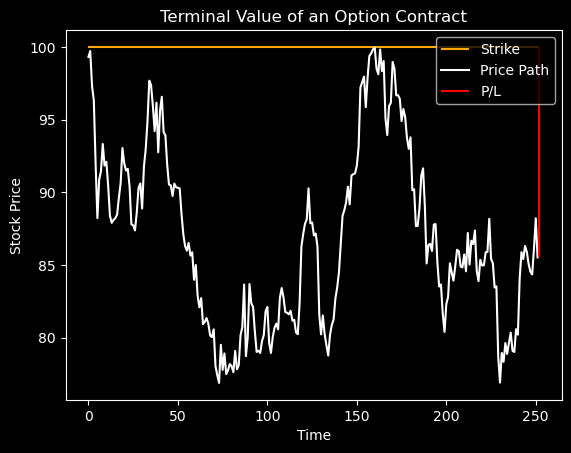

Premium at t=0: 14.231254785985819
P/L: -14.231254785985819


In [33]:
import qfin as qf


def blackscholes_call(S, K, sigma, r, T):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price


black_scholes_call(100, 100, 0.3, 0.05, 1)

# simulate dynamics of the underlying according to Geometric Brownian Motion
path = qf.simulations.GeometricBrownianMotion(100, 0.05, .3, 1/252, 1)


# create a chart of the price path and the strike price
plt.title("Terminal Value of an Option Contract")
plt.hlines(100, 0, 252, label='Strike', color='orange')
plt.plot(path.simulated_path, label='Price Path', color='white')
if max(path.simulated_path[-1] - 100, 0) == 0:
    plt.vlines(252, path.simulated_path[-1], 100, color='red', label="P/L")
else:
    plt.vlines(252, 100, path.simulated_path[-1], color='green', label="P/L")
plt.style.use('dark_background')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# print the premium and the resulting P/L
print("Premium at t=0:", blackscholes_call(100, 100, .3, .05, 1))
print("P/L:", max(path.simulated_path[-1] - 100, 0) - blackscholes_call(100, 100, .3, .05, 1))

https://github.com/romanmichaelpaolucci/BlackScholesTradingEdge/blob/main/Black-ScholesTrading.ipynb

## Implied Volatility

There are two types of volatility: historical and implied vol.
- Historical vol is in essence just the standard deviation of past futures prices
- Implied/market vol comes from option prices 

Vol is the key variable in option pricing, we can analyse an option price to determine the vol implied by the market.